Question 1

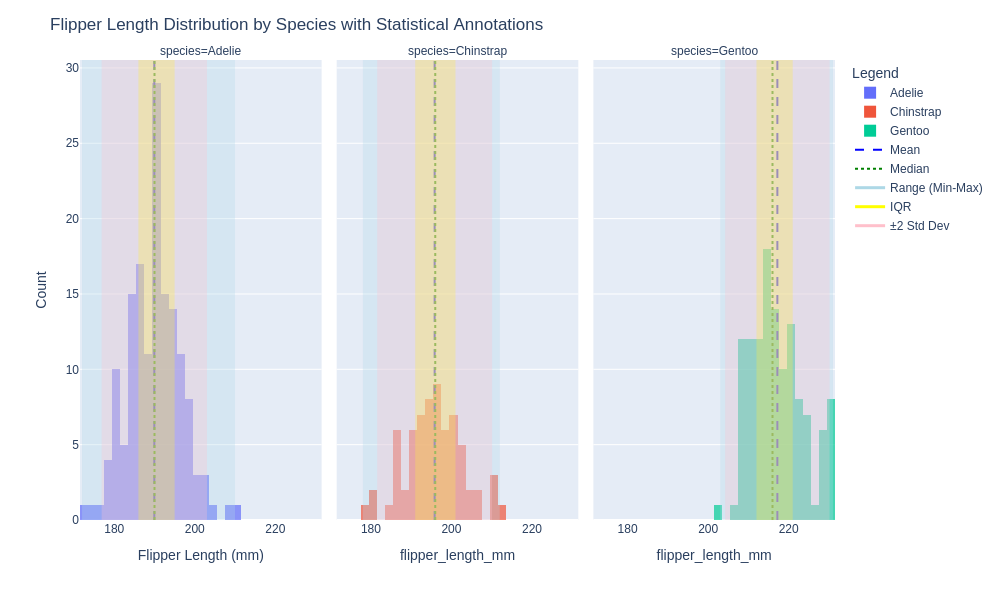

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing data in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to calculate statistics for each species
def calculate_stats(group):
    stats = {
        'mean': group['flipper_length_mm'].mean(),
        'median': group['flipper_length_mm'].median(),
        'min': group['flipper_length_mm'].min(),
        'max': group['flipper_length_mm'].max(),
        'std': group['flipper_length_mm'].std(),
        'q1': group['flipper_length_mm'].quantile(0.25),
        'q3': group['flipper_length_mm'].quantile(0.75)
    }
    stats['lower_2std'] = stats['mean'] - 2 * stats['std']
    stats['upper_2std'] = stats['mean'] + 2 * stats['std']
    return pd.Series(stats)

# Calculate stats for each species
species_stats = penguins.groupby('species').apply(calculate_stats)

# Create a figure with histograms for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", nbins=30, facet_col="species", opacity=0.7)

# Add transparent dummy traces to create a custom legend
# These traces will not appear on the plot but will be in the legend
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                         line=dict(color="blue", dash="dash"),
                         showlegend=True, name="Mean"))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                         line=dict(color="green", dash="dot"),
                         showlegend=True, name="Median"))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                         line=dict(color="lightblue", width=3),
                         showlegend=True, name="Range (Min-Max)"))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                         line=dict(color="yellow", width=3),
                         showlegend=True, name="IQR"))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                         line=dict(color="pink", width=3),
                         showlegend=True, name="±2 Std Dev"))

# Add vertical lines and rectangles to mark the statistics for each species
for species in species_stats.index:
    stats = species_stats.loc[species]
    
    # Add vlines for mean and median
    fig.add_vline(x=stats['mean'], line_dash="dash", line_color="blue", row=1, col=list(species_stats.index).index(species)+1)
    fig.add_vline(x=stats['median'], line_dash="dot", line_color="green", row=1, col=list(species_stats.index).index(species)+1)
    
    # Add vrect for min-max (range)
    fig.add_vrect(x0=stats['min'], x1=stats['max'], fillcolor="lightblue", opacity=0.3, line_width=0, row=1, col=list(species_stats.index).index(species)+1)
    
    # Add vrect for interquartile range (IQR)
    fig.add_vrect(x0=stats['q1'], x1=stats['q3'], fillcolor="yellow", opacity=0.3, line_width=0, row=1, col=list(species_stats.index).index(species)+1)
    
    # Add vrect for ±2 standard deviations
    fig.add_vrect(x0=stats['lower_2std'], x1=stats['upper_2std'], fillcolor="pink", opacity=0.3, line_width=0, row=1, col=list(species_stats.index).index(species)+1)

# Update layout for better visualization
fig.update_layout(title="Flipper Length Distribution by Species with Statistical Annotations",
                  height=600, width=1000,
                  xaxis_title="Flipper Length (mm)",
                  yaxis_title="Count",
                  legend_title="Legend")

# Show the figure
fig.show(renderer="png")

## Summary of Interactions for Question 1 

Here’s a summary of our exchanges that you can use as a record for your homework assignment:

Summary of Interactions:
Dataset and Task:

We worked with the penguins dataset from the URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv. The main task was to plot histograms of the flipper_length_mm for each species and overlay important statistical annotations (mean, median, range, interquartile range (IQR), and ±2 standard deviations) using Plotly in Python.
Initial Plot Setup:

We began by loading the dataset and creating histograms of flipper_length_mm for each species using plotly.express. We calculated various summary statistics for each species (mean, median, minimum, maximum, standard deviation, IQR).
We then used fig.add_vline() to add vertical lines representing the mean and median, and fig.add_vrect() to highlight ranges like min-max, IQR, and the range defined by ±2 standard deviations.
Legend for Statistical Annotations:

To avoid clutter and overlapping annotations in the histograms, we modified the approach by adding a custom legend instead of direct annotations on the plot. This was done by adding invisible go.Scatter traces to represent each statistical marker (mean, median, range, IQR, ±2 std deviations) with distinct colors or line styles (e.g., blue dashed line for mean, green dotted line for median).
Improving Visibility:

After adding the legend, we focused on making the mean and median lines darker and more visible by increasing their line width (line_width=3) and setting full opacity (opacity=1).
Final Code:

The final code included:
Loading the penguins dataset.
Calculating summary statistics for each species.
Plotting histograms with vertical lines for the mean and median, and shaded rectangles for range, IQR, and ±2 standard deviations.
Adding a custom legend to avoid overlapping annotations.
Making the mean and median lines bolder for better visibility.
This summary provides a clear outline of our step-by-step process and should work well as a record of the interactions we had in relation to your homework task. Let me know if you'd like any further modifications!

Transcript: https://chatgpt.com/share/66f1b5c9-b570-800e-8dce-c36905ccf1ea

Question 2

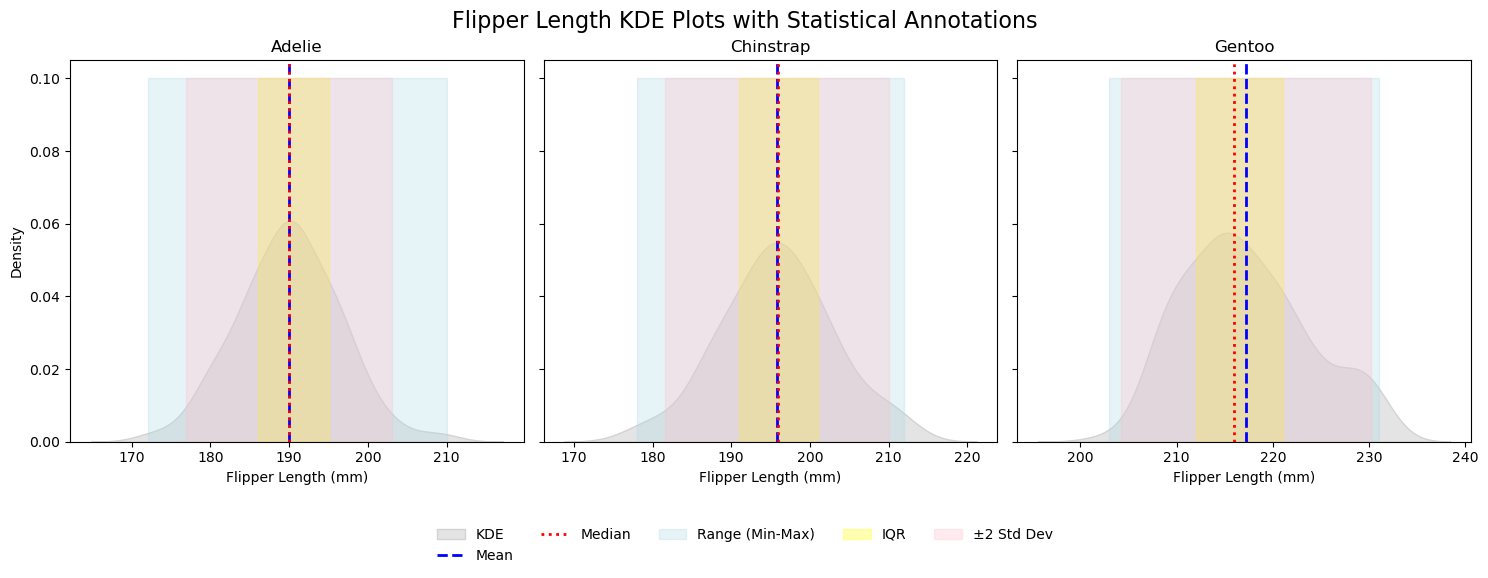

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing data in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to calculate statistics for each species
def calculate_stats(group):
    stats = {
        'mean': group['flipper_length_mm'].mean(),
        'median': group['flipper_length_mm'].median(),
        'min': group['flipper_length_mm'].min(),
        'max': group['flipper_length_mm'].max(),
        'std': group['flipper_length_mm'].std(),
        'q1': group['flipper_length_mm'].quantile(0.25),
        'q3': group['flipper_length_mm'].quantile(0.75)
    }
    stats['lower_2std'] = stats['mean'] - 2 * stats['std']
    stats['upper_2std'] = stats['mean'] + 2 * stats['std']
    return pd.Series(stats)

# Calculate stats for each species
species_stats = penguins.groupby('species').apply(calculate_stats)

# Set up a 1x3 grid for the KDE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Define colors for the shaded areas
range_color = "lightblue"
iqr_color = "yellow"
std_color = "pink"

# Loop through each species and create KDE plots with statistical annotations
for i, species in enumerate(species_stats.index):
    ax = axes[i]
    
    # Subset the data for the current species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    stats = species_stats.loc[species]
    
    # Plot the KDE for flipper_length_mm
    sns.kdeplot(data, ax=ax, fill=True, color='lightgray', alpha=0.6, label="KDE")
    
    # Add vertical lines for mean and median
    ax.axvline(stats['mean'], color="blue", linestyle="--", lw=2, label="Mean")
    ax.axvline(stats['median'], color="red", linestyle=":", lw=2, label="Median")
    
    # Add shaded areas for range (min-max), IQR, and ±2 std deviations
    ax.fill_betweenx([0, 0.1], stats['min'], stats['max'], color=range_color, alpha=0.3, label="Range (Min-Max)")
    ax.fill_betweenx([0, 0.1], stats['q1'], stats['q3'], color=iqr_color, alpha=0.3, label="IQR")
    ax.fill_betweenx([0, 0.1], stats['lower_2std'], stats['upper_2std'], color=std_color, alpha=0.3, label="±2 Std Dev")
    
    # Set plot title and labels
    ax.set_title(f'{species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Add a common legend below the plots
handles, labels = axes[0].get_legend_handles_labels()
# Combine all labels and make sure to only include "KDE" for the KDE line
unique_labels = {}
for handle, label in zip(handles, labels):
    if label == "KDE":
        unique_labels[label] = handle
    elif label not in unique_labels:
        unique_labels[label] = handle

fig.legend(unique_labels.values(), unique_labels.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5, frameon=False)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensure the title has space
fig.suptitle("Flipper Length KDE Plots with Statistical Annotations", fontsize=16)
plt.savefig("Flipper Length KDE Plots with Statistical Annotations", format="png", dpi=300)  # PNG format

# Show the plot
plt.show()


## Summary of interactions for Question 2 
- The same chatgpt session used for Question 1 was continued

Sure! Here’s a summary of our interactions related to your homework assignment:

Summary of Interactions:
Data Preparation: You worked with the penguins dataset from Seaborn and provided a URL for the dataset.

Plotting Histograms: You initially requested to create histograms for the flipper_length_mm for each species, using fig.add_hline() and fig.add_hrect() to mark various statistical metrics (mean, median, range, interquartile range, and standard deviation).

Legend Adjustments: You asked to adjust the opacity of mean and median lines and to ensure that the legend for rectangles did not overlap with the histogram titles.

Transition to KDE Plots: You then requested to create similar visualizations using Seaborn’s Kernel Density Estimation (KDE) plots, integrating Matplotlib’s ax.axhspan() or ax.fill_between() to highlight statistical metrics.

Legend Positioning: You wanted the legend to be moved to avoid overlapping with the title of the histogram.

Color Adjustments: You requested to change the color of the median line from green to red.

Clarification on Gentoo KDE: You inquired about the meaning of "Gentoo KDE," which was clarified as referring to either Gentoo Linux with the KDE desktop environment or KDE plots related to Gentoo penguins.

KDE Plotting Issue: You pointed out that the legend for the KDE plots incorrectly specified "Gentoo KDE" for each species. I acknowledged this and provided a corrected approach.

Final Legend Adjustment: You requested a common legend that simply says "KDE," without specifying the species.

Summary Request: You asked for a summary of our exchanges to submit as a record for your homework assignment.

Feel free to modify this summary as needed for your submission! If you have any further requests or adjustments, let me know.

Transcript: https://chatgpt.com/share/66f1b5c9-b570-800e-8dce-c36905ccf1ea

Question 3

In the lecture, we learned that there is not one data distribution method that is 'better' than the others because each one can contribute something that the other lacks. However, I do have a preference for box and whisker plots simply because I think that you can infer more statistical information from them. For example, it is easy to determine the mean, median, range, and IQR from a box and whisker plot by simply observing the figure. It can also help you identify outliers. While the plot itself does not demonstrate sample size and therefore does not help you infer about sampling bias, this information would much less painstaking to find yourself compared to calculating the mean, median, etc. for each variable.


Summary of interactions:
Here’s a summary of our exchanges, formatted for submission as a record of our interaction:

Summary of Interactions: Differences between Histograms, Box Plots, and Kernel Density Estimation
In our discussion, we explored the key differences, advantages, and disadvantages of three common data visualization methods: histograms, box plots, and kernel density estimation (KDE).

Histograms:

Initial Thoughts: You noted that histograms show the frequency distribution of variables and provide insight into the sample size through the use of bins (side-by-side bars).
Additional Insights: We discussed how histograms allow you to see the raw counts of data in specific intervals (bins) and how the bin size can affect interpretation. The main advantage is its ability to clearly show frequency and provide a rough idea of data distribution, but the blocky appearance can obscure finer details. Histograms also struggle when comparing multiple datasets.
Box Plots:

Initial Thoughts: You highlighted that box plots don’t show sample size but are useful for determining the median, mode, range, interquartile range, and outliers.
Additional Insights: Box plots offer a compact way to summarize key statistics (median, quartiles, and outliers) and allow for easy comparison between different datasets. However, they do not show the actual shape of the distribution and don’t provide insight into the sample size, which could be a limitation in certain contexts.
Kernel Density Estimation (KDE):

Initial Thoughts: You mentioned that KDE is similar to histograms but with infinitely small bins, producing a smooth line rather than bars.
Additional Insights: KDE smooths data into a continuous curve, making it ideal for visualizing the overall shape of a distribution. It’s particularly useful for overlaying multiple distributions for comparison. However, it is sensitive to bandwidth choice (the smoothing parameter), and it doesn’t show exact counts, which can sometimes lead to misleading interpretations if the dataset is small or sparse.
Overall Evaluation and Takeaways:
We evaluated each method based on their strengths and weaknesses:

Histograms are best for understanding frequency distributions and sample size.
Box Plots are effective for summarizing key statistics and identifying outliers.
KDE provides a smooth, continuous representation of data distribution, making it suitable for detailed shape analysis and comparisons, though it lacks count information.
This discussion deepened the understanding of when and why to use each visualization technique depending on the analysis goal.

Feel free to adjust or expand any part of this summary if necessary!

Transcript: https://chatgpt.com/share/66f208d3-eb78-800e-9974-30cccd5b4439

Question 4

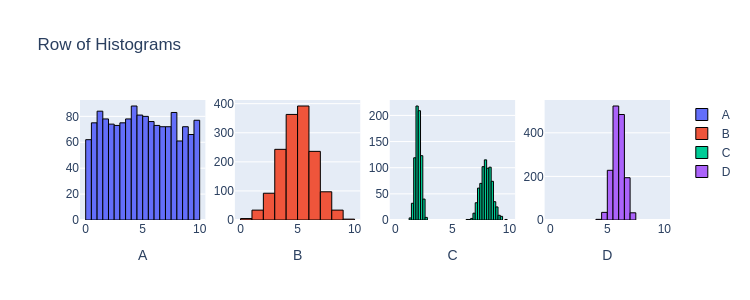

In [16]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances: B and D
2. Which datasets have similar means but quite different variances: B and C
3. Which datasets have similar variances but quite different means: C and D
4. Which datasets have quite different means and quite different variances: A and B

Question 5

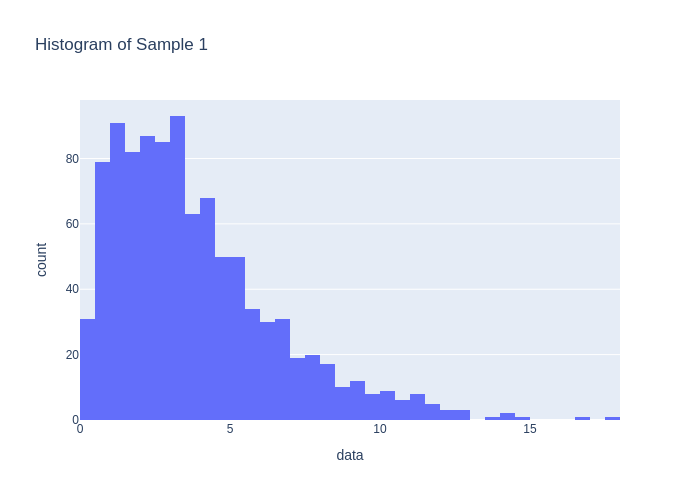

Mean of Sample 1: 3.858500439194798, Median of Sample 1: 3.2061569038126363


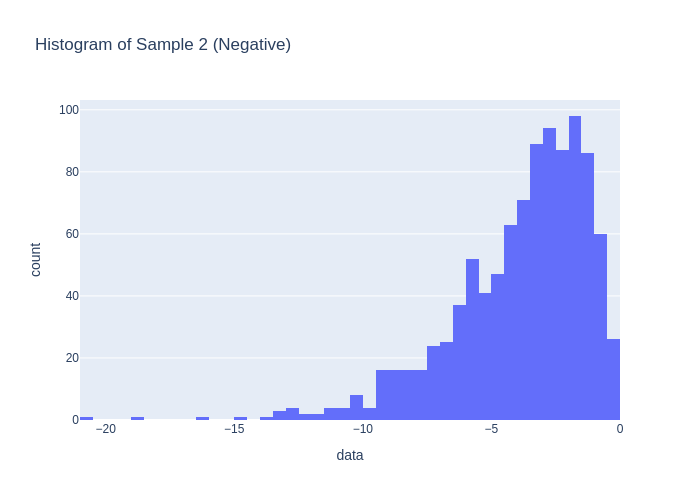

Mean of Sample 2: -3.893873186924212, Median of Sample 2: -3.267251930692706


In [17]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Histogram of Sample 1")
fig1.show(renderer="png")

mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)
print(f"Mean of Sample 1: {mean_sample1}, Median of Sample 1: {median_sample1}")

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Histogram of Sample 2 (Negative)")
fig2.show(renderer="png")

mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)
print(f"Mean of Sample 2: {mean_sample2}, Median of Sample 2: {median_sample2}")


To determine skewness, you need to look at the tail of the histogram. For example, in the histograms above, the histogram of sample 1 would be right skewed while the histogram of sample 2 would be left skewed. In a symmetirc histogram with little skew, the mean and median are usually consistent with each other - in other words, close in value. However, in a right skewed histogram, the mean will be greater than the median. This is because the mean is more sensitive; thus, it is essentially 'pulled' to the right by the few larger values. On the other hand, the median is less sensitive and the right skewness has little effect. The same applies to left skewness so this time the mean will be less than the median becuase the few smaller values 'pull' the mean to the left. The sensitivity of the mean to outliers is becuase it considers every single data point in its calculation. The two histograms drawn above clearly demonstrate this relationship as in the histogram for sample 1 (right skewed), the mean is greater than the median, while in the histogram for sample 2 (left skewed), the mean is less than the median.

## Summary of Interactions

Here’s a summary of our exchanges for your homework submission:

Summary of Interactions:
Relationship between Mean, Median, and Skewness:

We discussed how the mean and median behave in right-skewed and left-skewed distributions:
In a right-skewed distribution (positive skew), the mean is greater than the median because the long tail on the right pulls the mean upwards.
In a left-skewed distribution (negative skew), the mean is less than the median as the long tail on the left pulls the mean downwards.
The reason for this difference is that the mean is sensitive to extreme values (outliers), while the median is more resistant.
Code Explanation (Generating Right- and Left-Skewed Distributions):

You shared a Python code that uses the scipy library to generate random samples from a Gamma distribution and plot a histogram. We went over the following:
The Gamma distribution is right-skewed, and its values were stored in sample1.
The code then negated the Gamma distribution to generate a left-skewed distribution (sample2).
Summary statistics, such as the mean and median, were calculated for sample1.
The histogram visualizes the right-skewed distribution, and by negating the values, the distribution is flipped to become left-skewed.
Explanation of Left- and Right-Skewed Histograms:

A right-skewed histogram has most data points clustered on the left with a tail extending to the right, while a left-skewed histogram has most data points clustered on the right with a tail extending to the left.
I provided a text-based visual representation of both types of histograms to clarify how they look.
This summary should provide a clear record of our discussion on skewness and the corresponding Python code.

Transcript: https://chatgpt.com/share/66f35b89-5e8c-800e-8197-7ee7e7daa82e

Question 6

In [18]:
import pandas as pd
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
df = pd.read_csv(url)
df.isna().sum()

Name              0
Intelligence      0
Strength          0
Speed             0
Durability        0
Power             0
Combat            0
Alter Egos        0
Publisher         8
Alignment         6
Gender            0
Race            295
Height            0
Weight            0
Eye color       171
Hair color      170
Skin color      668
Total Power       0
dtype: int64

In [19]:
df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total Power
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,75.632571,42.415882,41.063257,55.713324,60.969044,57.489906,358.156124
std,27.617738,34.366396,27.479716,33.277238,34.257671,29.130334,107.582626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
25%,75.000000,10.000000,25.000000,30.000000,35.000000,40.000000,260.000000
50%,85.000000,35.000000,35.000000,60.000000,65.000000,65.000000,350.000000
75%,90.000000,75.000000,60.000000,85.000000,95.000000,80.000000,440.000000
max,100.000000,100.000000,100.000000,100.000000,240.000000,105.000000,600.000000


In [20]:
df.value_counts()

Name             Intelligence  Strength  Speed  Durability  Power  Combat  Alter Egos  Publisher          Alignment  Gender  Race               Height         Weight             Eye color  Hair color  Skin color  Total Power
Abe Sapien       95            30        35     65          100    85      No          Dark Horse Comics  good       Male    Icthyo Sapien      6'3 // 191 cm  145 lb // 65 kg    Blue       No Hair     Blue        410            1
Sinestro         90            85        55     65          100    55      Yes         DC Comics          neutral    Male    Korugaran          6'7 // 201 cm  205 lb // 92 kg    Black      Black       Red         450            1
Leonardo         90            20        50     65          60     80      No          IDW Publishing     good       Male    Mutant             - // 0 cm      - lb // 0 kg       Blue       No Hair     Green       365            1
Living Tribunal  100           100       100    100         100    30      No        

In [21]:
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
df = pd.read_csv(url)
del df['Race']
del df['Eye color']
del df['Hair color']
del df['Skin color']
missingness_per_row = df.isna().sum(axis=1)
print(missingness_per_row)
rows_with_missing = df[missingness_per_row > 0]
print(rows_with_missing)

0      0
1      0
2      0
3      0
4      0
      ..
738    0
739    0
740    0
741    0
742    0
Length: 743, dtype: int64
                 Name  Intelligence  Strength  Speed  Durability  Power  \
33         Anti-Venom            90        60     65          90    100   
59          Bananaman            60        50     35          80     30   
88       Bionic Woman            80        40     35          40     20   
112         Blackwulf            80        30     10          30     70   
140        Brundlefly            85        35     25          40     35   
284          Godzilla            75       100     55         100    100   
382  Katniss Everdeen            80        10     25          25     25   
390         King Kong            80       100     75          75     50   
424           Mad Max             0         0      0           0      0   
428   Man of Miracles           100       100    100         100    100   
539                 Q           100        15     

In [22]:
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
df = pd.read_csv(url)
del df['Race']
del df['Eye color']
del df['Hair color']
del df['Skin color']
df.drop([33, 112, 428, 539, 685, 701], inplace = True)
df.isna().sum()

Name            0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Alter Egos      0
Publisher       8
Alignment       0
Gender          0
Height          0
Weight          0
Total Power     0
dtype: int64

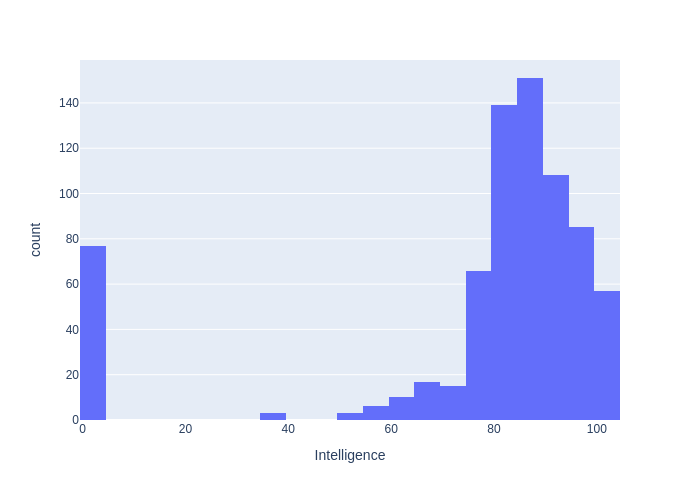

In [23]:
import plotly.express as px
fig = px.histogram(df, x="Intelligence")
fig.show(renderer="png")

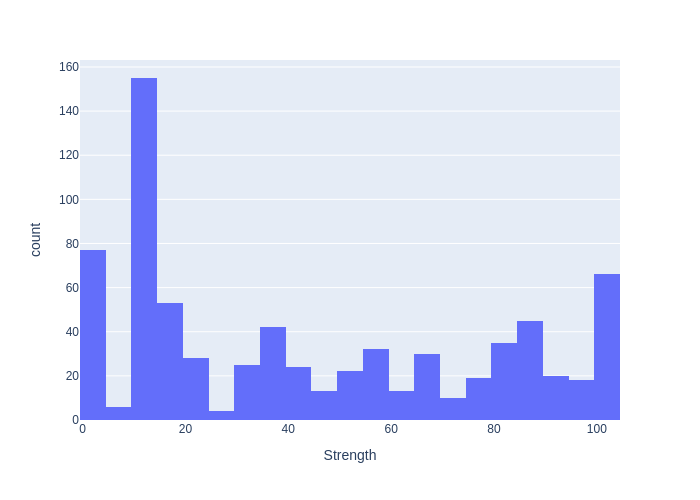

In [24]:
fig = px.histogram(df, x="Strength")
fig.show(renderer="png")

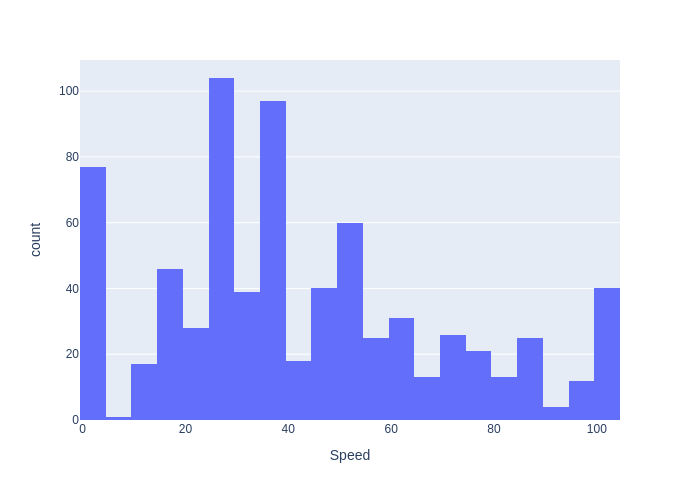

In [25]:
fig = px.histogram(df, x="Speed")
fig.show(renderer="png")

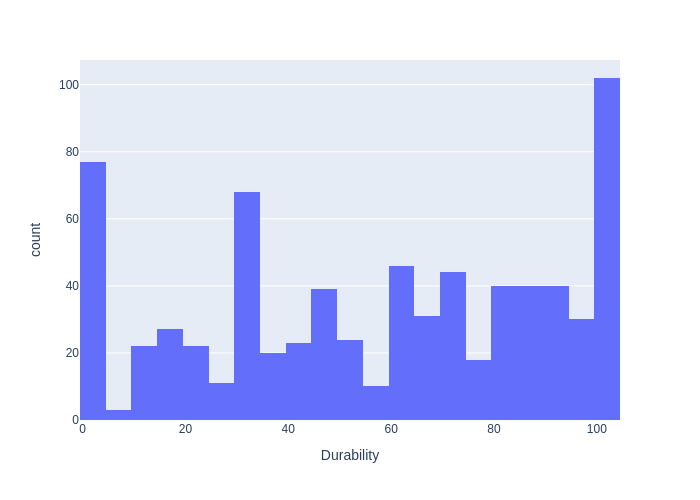

In [26]:
fig = px.histogram(df, x="Durability")
fig.show(renderer="png")

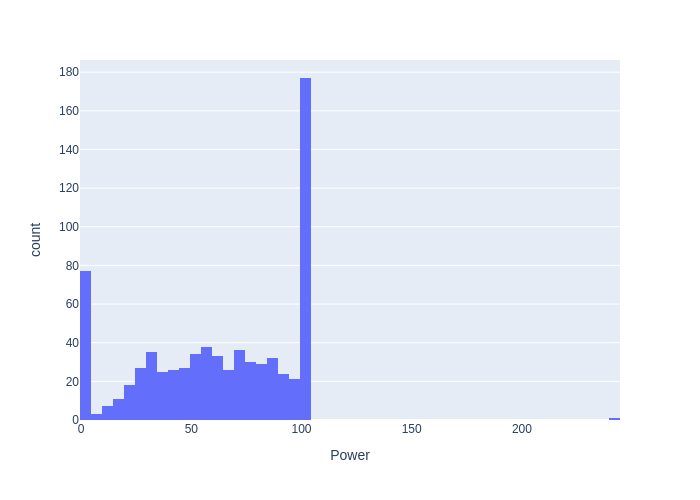

In [27]:
fig = px.histogram(df, x="Power")
fig.show(renderer="png")

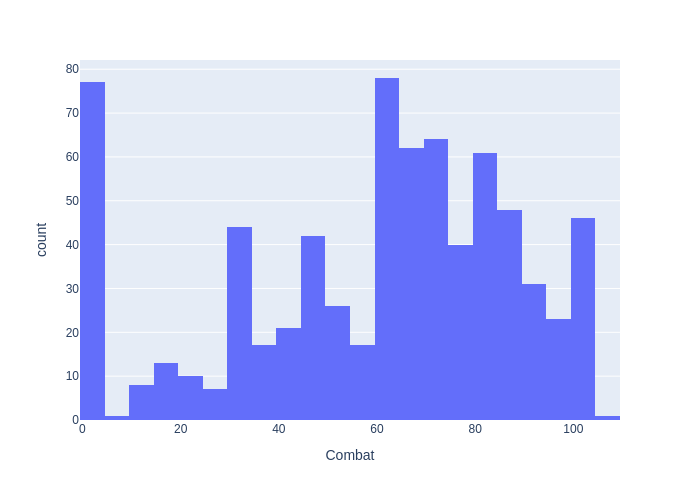

In [28]:
fig = px.histogram(df, x="Combat")
fig.show(renderer="png")

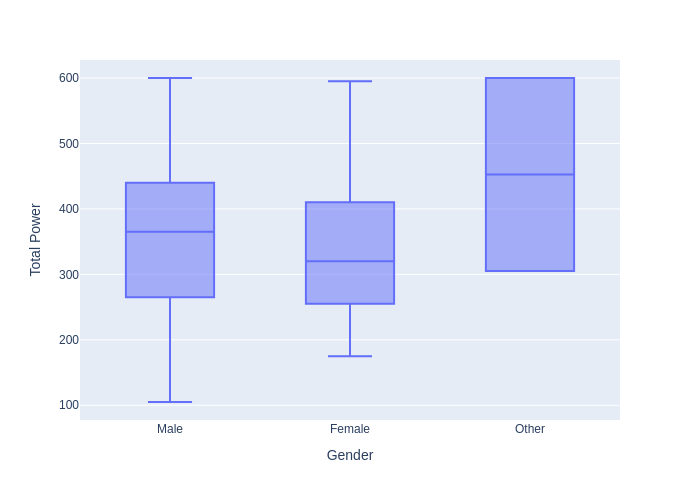

In [29]:
fig = px.box(df, x="Gender", y="Total Power")
fig.show(renderer="png")

Question 7

In [30]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Question 8

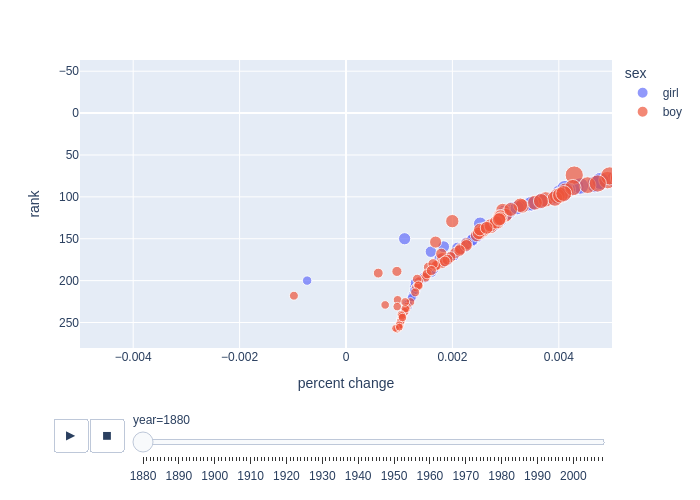

In [31]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] 
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] 
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') 
fig.show(renderer="png")

Question 9
Yes 